In [7]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data
from utils import comp_metrics, describe_model_architecture
import numpy as np
import json

In [8]:
version = 'v3'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [9]:
# Daten laden
_, _, testd = load_data(data_path, window_size=30)

In [10]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [11]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "lstm_2",
    "type": "LSTM",
    "units": 64
  },
  {
    "name": "dropout_2",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "lstm_3",
    "type": "LSTM",
    "units": 128
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 64
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.6381028890609741
Mean Squared Error (MSE): 4.496333122253418
Mean Absolute Percentage Error (MAPE): 1.60%


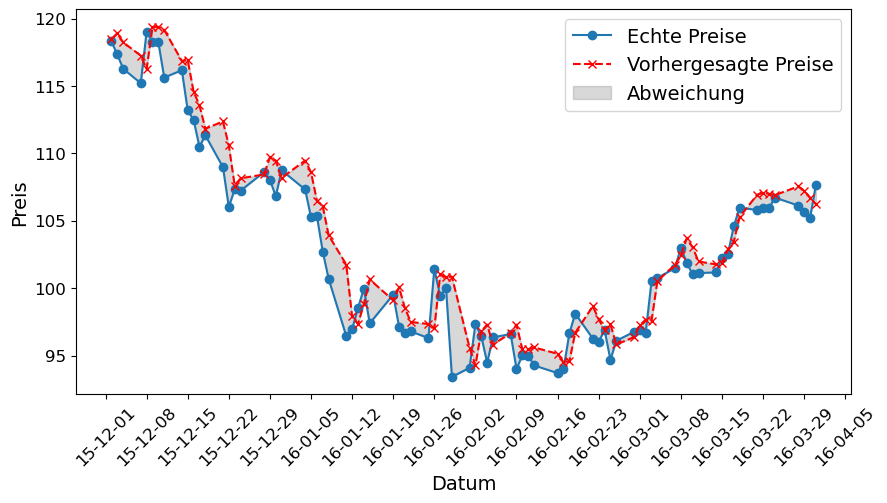

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 12.850547790527344
Mean Squared Error (MSE): 332.4856872558594
Mean Absolute Percentage Error (MAPE): 2.17%


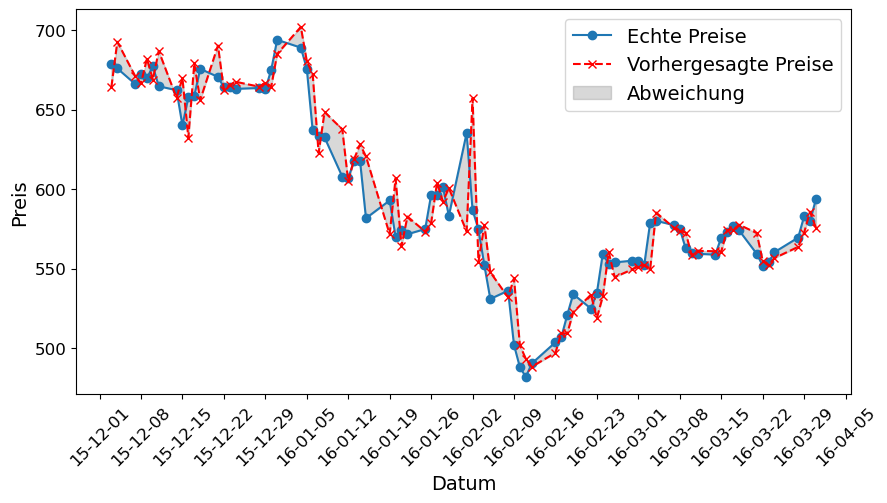

Predicting BABA...
Metrics for BABA
Mean Absolute Error (MAE): 1.2677000761032104
Mean Squared Error (MSE): 2.522671937942505
Mean Absolute Percentage Error (MAPE): 1.86%


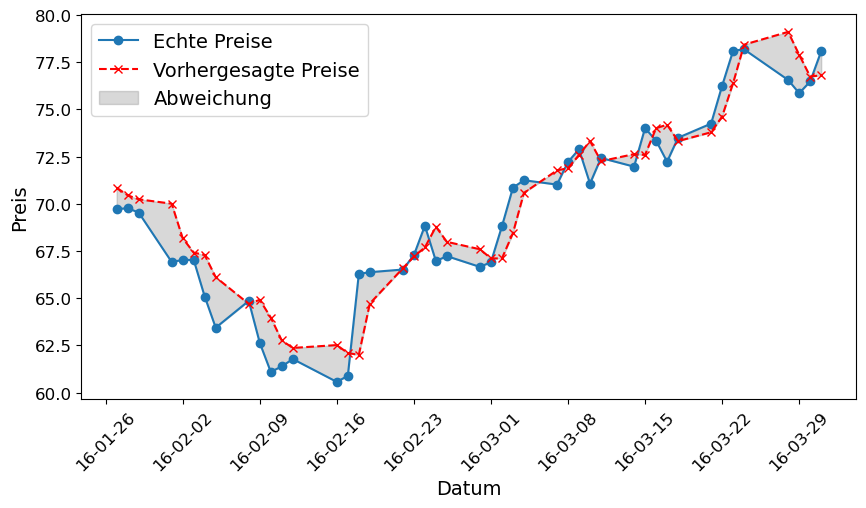

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.37288424372673035
Mean Squared Error (MSE): 0.2434113770723343
Mean Absolute Percentage Error (MAPE): 1.47%


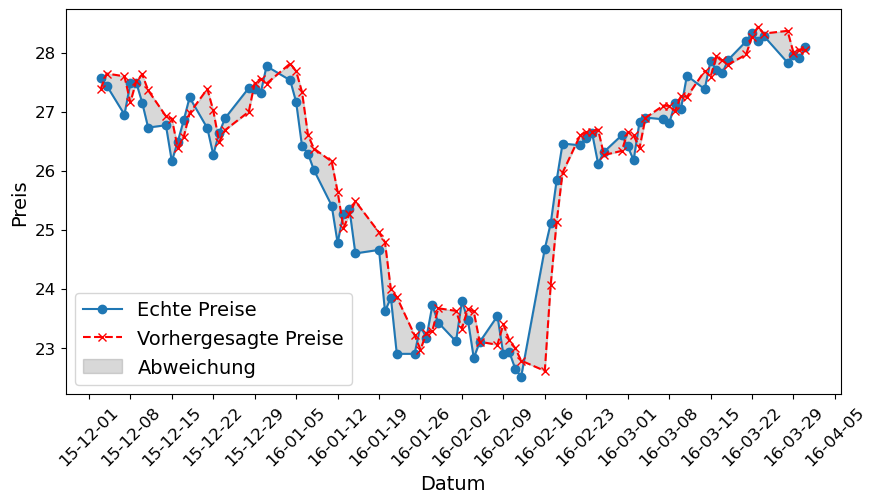

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.646958351135254
Mean Squared Error (MSE): 6.3648834228515625
Mean Absolute Percentage Error (MAPE): 1.58%


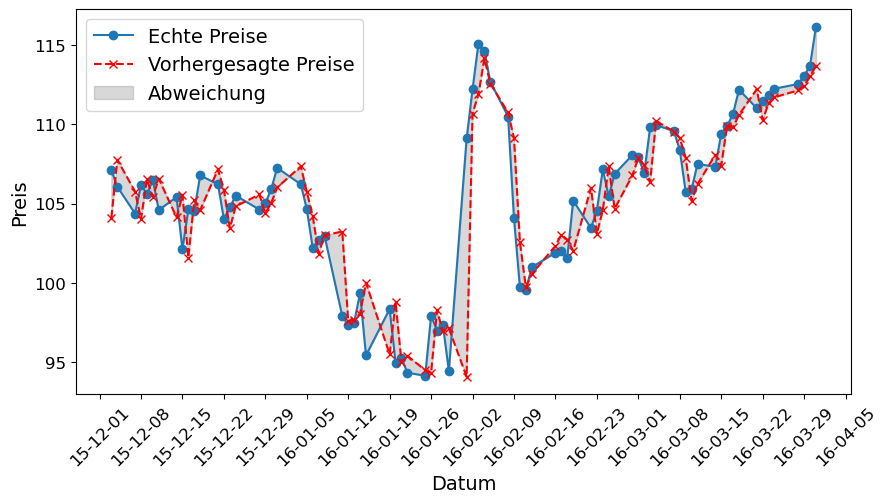

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 10.464930534362793
Mean Squared Error (MSE): 187.4769744873047
Mean Absolute Percentage Error (MAPE): 1.44%


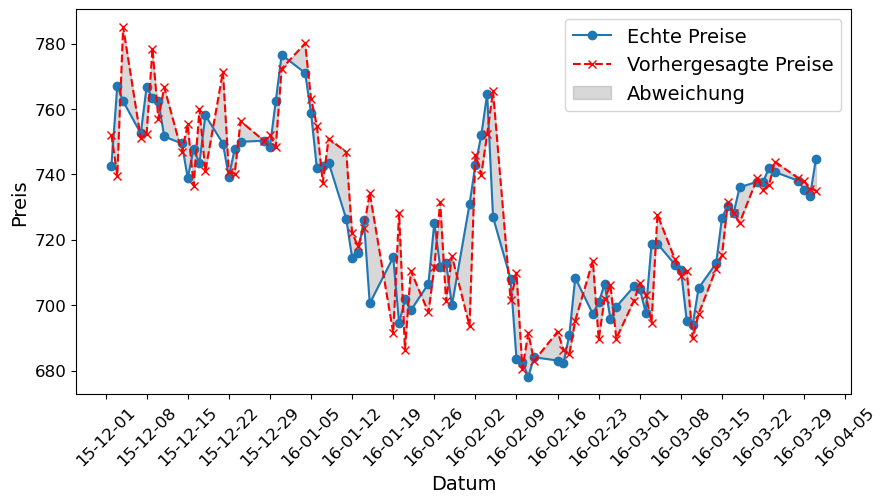

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4445863366127014
Mean Squared Error (MSE): 0.39124950766563416
Mean Absolute Percentage Error (MAPE): 1.41%


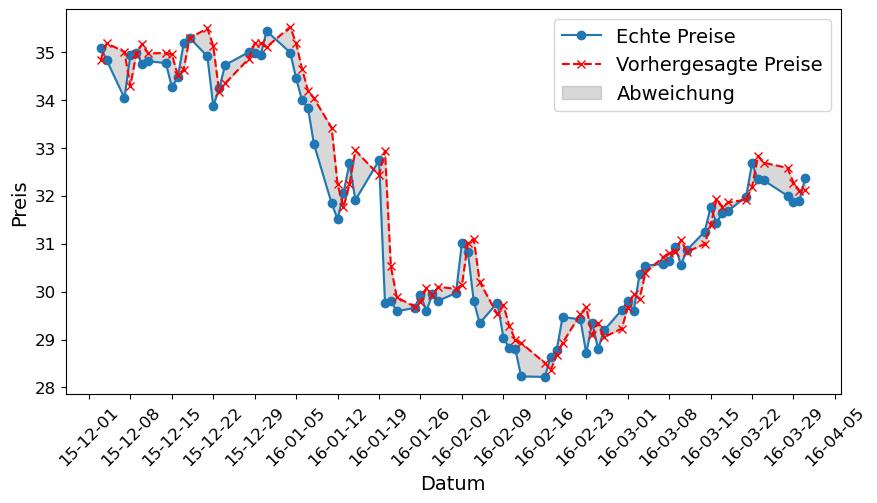

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7366916537284851
Mean Squared Error (MSE): 0.8617125153541565
Mean Absolute Percentage Error (MAPE): 1.39%


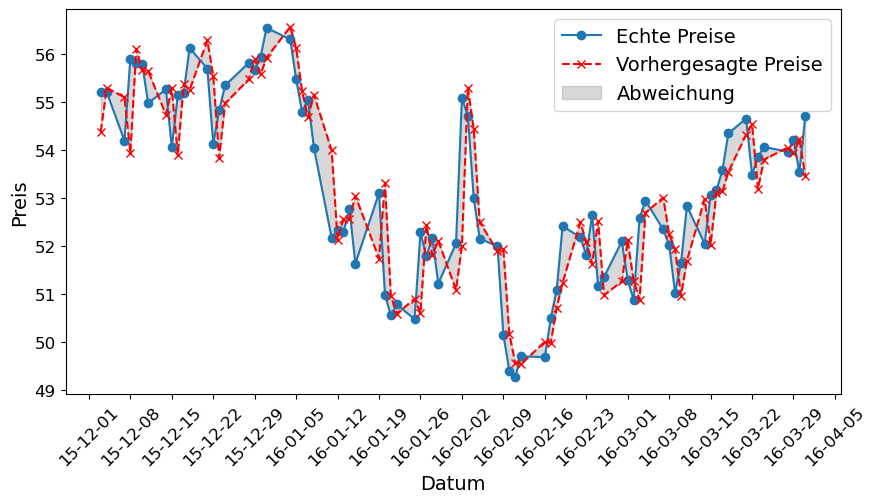

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.5678474307060242
Mean Squared Error (MSE): 0.5234301686286926
Mean Absolute Percentage Error (MAPE): 1.56%


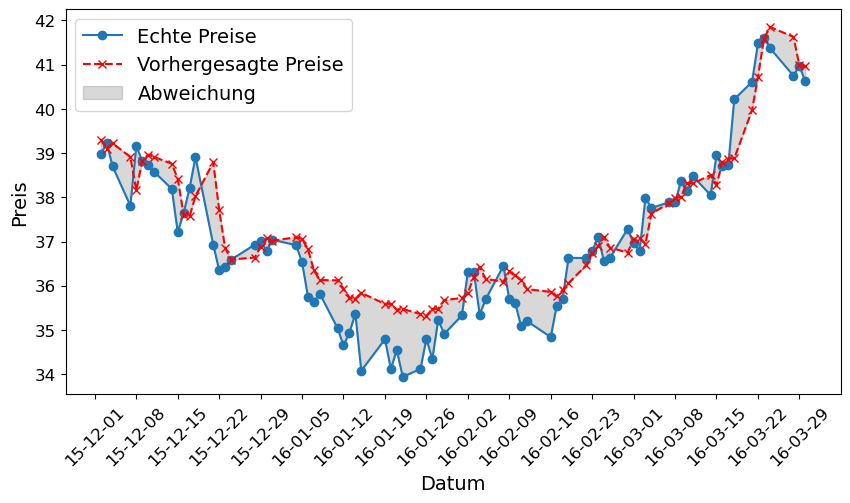

Predicting TSM...
Metrics for TSM
Mean Absolute Error (MAE): 0.28953662514686584
Mean Squared Error (MSE): 0.1455194503068924
Mean Absolute Percentage Error (MAPE): 1.27%


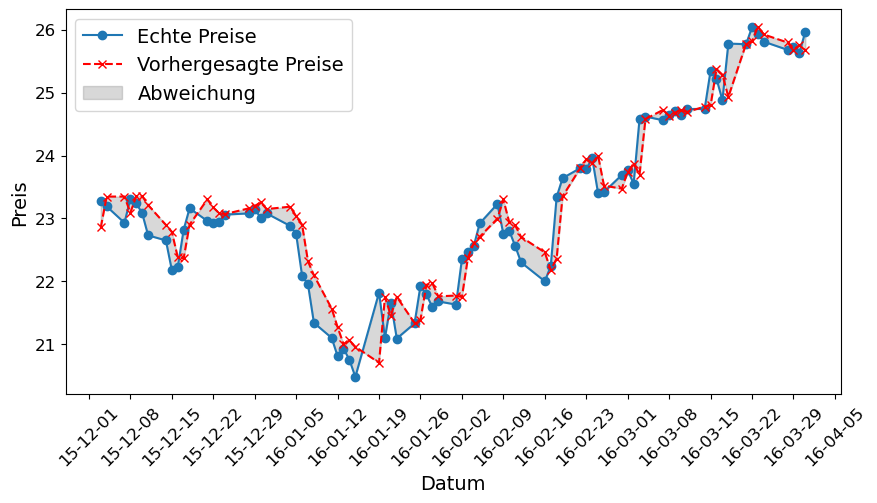

In [12]:
for i in range(len(testd)):
    stock_testd = testd[i]
    scaler = stock_testd['scaler']
    stock_name = stock_testd['stock']
    df = stock_testd['df']
    
    X = []
    y = []
    for i in range(len(stock_testd['test_data'])):
        data = stock_testd['test_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict(X)
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)